In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("Flight_dataset.csv")

In [39]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [40]:
df.shape

(300153, 12)

In [41]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [42]:
df.drop(["Unnamed: 0","flight","duration"],axis=1, inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


In [44]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

<Axes: xlabel='airline'>

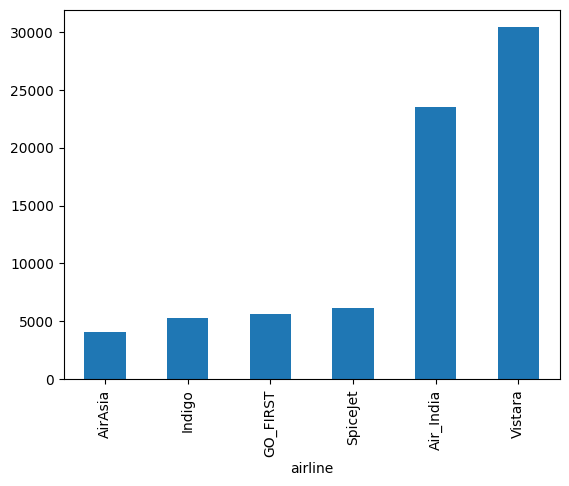

In [45]:
df.groupby('airline')['price'].mean().sort_values().plot(kind = ('bar'))

In [46]:
def convertor(x):
  if x=="AirAsia":
    return 0
  elif x=="Indigo":
    return 1
  elif x=="GO_FIRST":
    return 2
  elif x=="SpiceJet":
    return 3
  elif x=="Air_India":
    return 4
  else:
    return 5
df["airline"] =df["airline"].map(convertor)

In [47]:
df["airline"].unique()

array([3, 0, 5, 2, 1, 4])

In [48]:
df["class"].unique()

array(['Economy', 'Business'], dtype=object)

<Axes: xlabel='airline'>

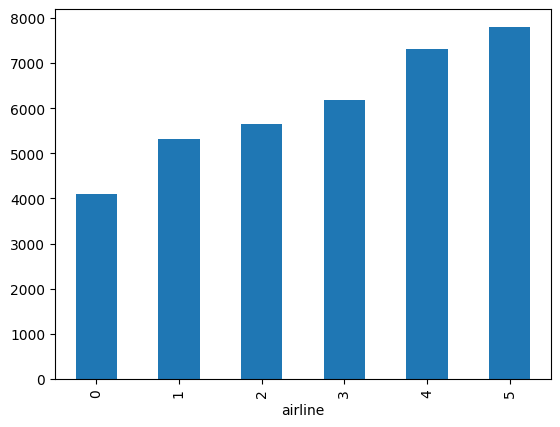

In [49]:
df[df["class"] == "Economy"].groupby('airline')['price'].mean().sort_values().plot(kind = ('bar'))

<Axes: xlabel='airline'>

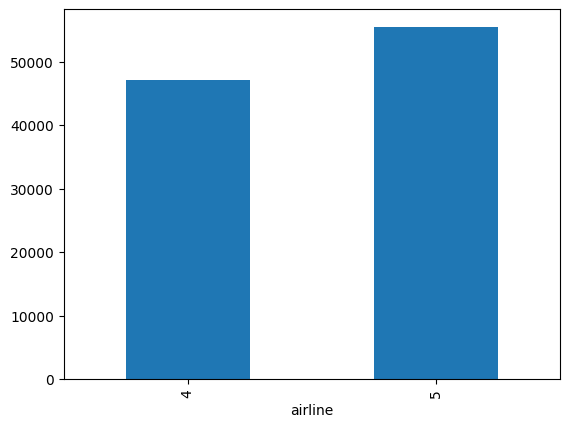

In [50]:
df[df["class"] == "Business"].groupby('airline')['price'].mean().sort_values().plot(kind = ('bar'))

In [51]:
df["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

<Axes: xlabel='destination_city'>

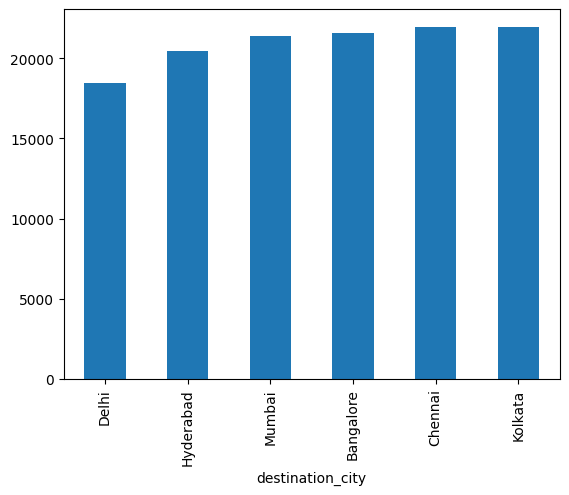

In [52]:
df.groupby('destination_city')['price'].mean().sort_values().plot(kind = ('bar'))

In [53]:
df["destination_city"] = df["destination_city"].map({"Delhi":0,"Hyderabad":1,"Mumbai":2,"Bangalore":3,"Chennai":4,"Kolkata":5})

<Axes: xlabel='source_city'>

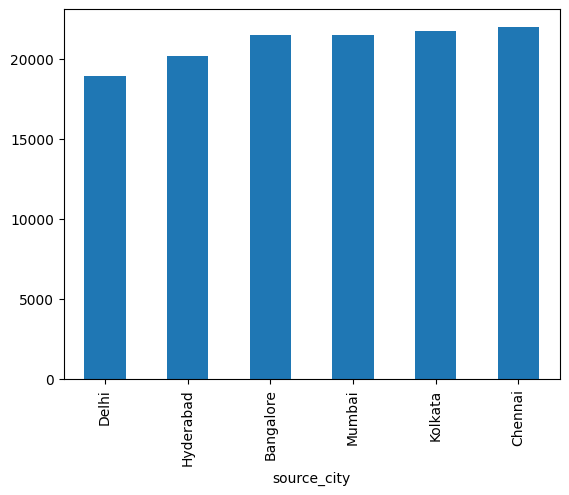

In [54]:
df.groupby("source_city")["price"].mean().sort_values().plot(kind = ("bar"))

In [55]:
df["source_city"] = df["source_city"].map({"Delhi":0,"Hyderabad":1,"Bangalore":2,"Mumbai":3,"Kolkata":4,"Chennai":5})

In [56]:
df["class"] = df["class"].map({"Economy":0,"Business":1})

In [57]:
df["arrival_time"].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [58]:
df["arrival_time"] = df["arrival_time"].map({"Early_Morning":0,"Morning":1,"Afternoon":2,"Evening":3,"Night":4,"Late_Night":5})

In [59]:
df["departure_time"] = df["departure_time"].map({"Early_Morning":0,"Morning":1,"Afternoon":2,"Evening":3,"Night":4,"Late_Night":5})

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  int64 
 1   source_city       300153 non-null  int64 
 2   departure_time    300153 non-null  int64 
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  int64 
 5   destination_city  300153 non-null  int64 
 6   class             300153 non-null  int64 
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 20.6+ MB


In [61]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [62]:
df["stops"] = df["stops"].map({"zero":0 , "one":1 , "two_or_more":2})

In [63]:
df.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
days_left,0
price,0


In [64]:
corr_matrix = df.corr()

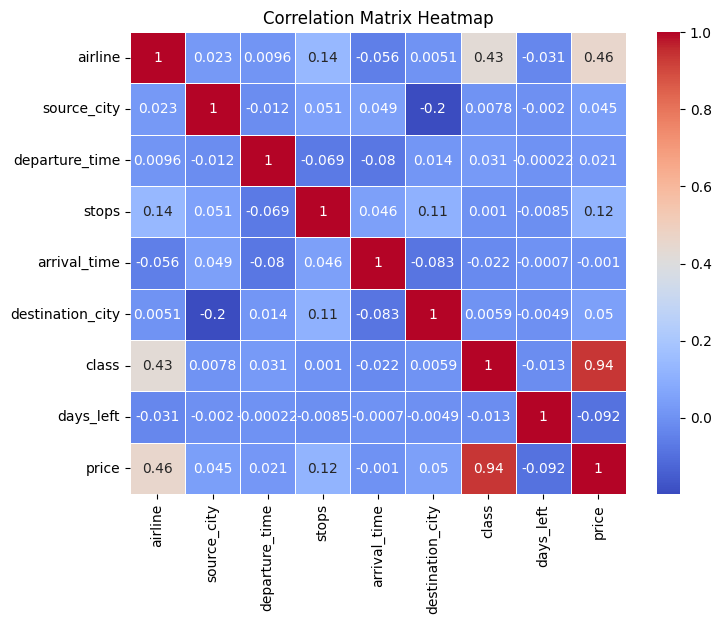

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [66]:
import sklearn

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop(["price"],axis = 1)

In [69]:
y = df["price"]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model_price = RandomForestRegressor(random_state=42)
model_price.fit(X_train, y_train)
pred_price = model_price.predict(X_test)

print("MAE (Price):", mean_absolute_error(y_test, pred_price))
print("R2 (Price):", r2_score(y_test, pred_price))


MAE (Price): 2159.422662010444
R2 (Price): 0.9621325572539074


In [72]:
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],          # Reduced: just 2 values
    'max_depth': [None, 10, 20],        # Removed the deepest option
    'min_samples_split': [2, 5],        # Less combinations
    'min_samples_leaf': [1, 2],         # Fewer options
    'max_features': ['sqrt']            # Fixed to sqrt (best for regression)
}


In [73]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best R2 Score: 0.9684931520938668


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test R2:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))


In [85]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test R2:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Test R2: 0.968515198844391
Test MAE: 2088.4681220849457


In [106]:
import pickle

# Save the best model
with open('best_price_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("✅ Model saved as best_price_model.pkl")


✅ Model saved as best_price_model.pkl


In [108]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

# --- Load the model ---
with open('best_price_model.pkl', 'rb') as f:
    model = pickle.load(f)

# --- Streamlit UI ---
st.set_page_config(page_title="Flight Price Prediction", page_icon="✈️", layout="centered")
st.title("✈️ Flight Price Prediction")

st.sidebar.header("Flight Details")
airline = st.sidebar.selectbox("Airline", ["AirAsia", "Indigo", "GO_FIRST", "SpiceJet", "Air_India", "Vistara"])
source = st.sidebar.selectbox("Source City", ["Delhi", "Hyderabad", "Bangalore", "Mumbai", "Kolkata", "Chennai"])
departure = st.sidebar.selectbox("Departure Time", ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"])
arrival = st.sidebar.selectbox("Arrival Time", ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"])
destination = st.sidebar.selectbox("Destination City", ["Delhi", "Hyderabad", "Mumbai", "Bangalore", "Chennai", "Kolkata"])
stops = st.sidebar.selectbox("Stops", ["zero", "one", "two_or_more"])
flight_class = st.sidebar.selectbox("Class", ["Economy", "Business"])
days_left = st.sidebar.slider("Days Left to Departure", 0, 365, 30)

# --- Mapping dictionaries (same as model training) ---
airline_dict = {'AirAsia': 0, "Indigo": 1, "GO_FIRST": 2, "SpiceJet": 3, "Air_India": 4, "Vistara": 5}
source_dict = {'Delhi': 0, "Hyderabad": 1, "Bangalore": 2, "Mumbai": 3, "Kolkata": 4, "Chennai": 5}
departure_dict = {'Early_Morning': 0, "Morning": 1, "Afternoon": 2, "Evening": 3, "Night": 4, "Late_Night": 5}
arrival_dict = {'Early_Morning': 0, "Morning": 1, "Afternoon": 2, "Evening": 3, "Night": 4, "Late_Night": 5}
destination_dict = {'Delhi': 0, "Hyderabad": 1, "Mumbai": 2, "Bangalore": 3, "Chennai": 4, "Kolkata": 5}
class_dict = {'Economy': 0, 'Business': 1}
stops_dict = {'zero': 0, "one": 1, "two_or_more": 2}

# --- Predict Button ---
if st.button("🎯 Predict Price"):
    try:
        # Prepare input array
        input_features = np.array([[
            airline_dict[airline],
            source_dict[source],
            departure_dict[departure],
            arrival_dict[arrival],
            destination_dict[destination],
            stops_dict[stops],
            class_dict[flight_class],
            days_left
        ]])

        # Predict
        predicted_price = model.predict(input_features)[0]
        st.success(f"💸 Estimated Flight Price: ₹{round(predicted_price, 2)}")

    except Exception as e:
        st.error(f"Prediction Error: {e}")

# --- Footer ---
st.markdown("---")
st.caption("Made with ❤️ using Streamlit")


Writing app.py


In [101]:
!pip install streamlit pyngrok

from pyngrok import ngrok
import threading
import os

# Set your ngrok authtoken (run this only once per session)
ngrok.set_auth_token("YOUR_TOKEN_HERE")






In [109]:
import os
import threading

# Connect to ngrok tunnel on port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit URL: {public_url}")

# Run Streamlit app in a separate thread
def run():
    os.system("streamlit run app.py")

threading.Thread(target=run).start()


Streamlit URL: NgrokTunnel: "https://6c5f-34-139-186-190.ngrok-free.app" -> "http://localhost:8501"
